<a href="https://colab.research.google.com/github/BoyoungH/2D-to-3D-Nerf/blob/main/input_SRN%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import glob

In [ ]:
images = sorted(glob.glob('/content/images2/*.png'))
print(images)
rgb_array = []
for fname in images:
  img = cv2.imread(fname)
  rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  rgb_array.append(rgb)
rgb_array = np.array(rgb_array)
normalized_array = np.maximum(rgb_array / 255.0, 0)
normalized_array.shape

['/content/images2/000000.png', '/content/images2/000001.png', '/content/images2/000002.png', '/content/images2/000003.png', '/content/images2/000004.png', '/content/images2/000005.png', '/content/images2/000006.png', '/content/images2/000007.png', '/content/images2/000008.png', '/content/images2/000009.png', '/content/images2/000010.png', '/content/images2/000011.png', '/content/images2/000012.png', '/content/images2/000013.png', '/content/images2/000014.png', '/content/images2/000015.png', '/content/images2/000016.png', '/content/images2/000017.png', '/content/images2/000018.png', '/content/images2/000019.png', '/content/images2/000020.png', '/content/images2/000021.png', '/content/images2/000022.png', '/content/images2/000023.png', '/content/images2/000024.png', '/content/images2/000025.png', '/content/images2/000026.png', '/content/images2/000027.png', '/content/images2/000028.png', '/content/images2/000029.png', '/content/images2/000030.png', '/content/images2/000031.png', '/conte

(251, 128, 128, 3)

In [ ]:
# 파일명 리스트를 얻는다
file_names = sorted(glob.glob('/content/pose/*.txt'))

# 모든 파일을 읽어들인다
text_data = []
for file_name in file_names:
    with open(file_name, 'r') as f:
        text_data.append(f.readlines())

# 텍스트 데이터를 4x4 행렬로 바꾸어서 새로운 리스트에 저장한다
matrix_data = []
for data in text_data:
    matrix = [list(map(np.float32, line.split())) for line in data]
    matrix_data.append(matrix)

# 넘파이 array로 변환하고 3차원 행렬로 변환
poses = np.array(matrix_data, dtype=np.float32)
poses = poses.reshape(-1, 4, 4)

print(poses.shape)

(251, 4, 4)


In [ ]:

with open('/content/intrinsics.txt','r') as f:
  focal_length = f.readline().strip()
  focal = float(focal_length.split()[0])
print(focal)

131.25


In [ ]:
np.savez('tiny_nerf_sharpeningchair.npz',normalized_array=normalized_array, poses=poses, focal=focal)

(251, 128, 128, 3)


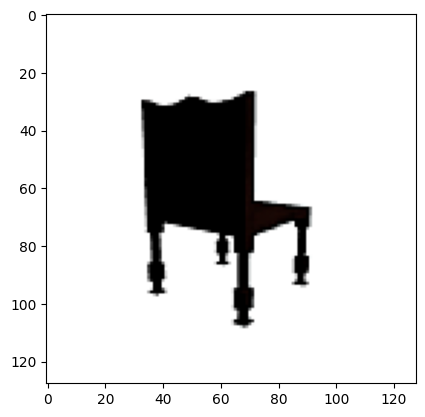

In [ ]:
import matplotlib.pyplot as plt
images = normalized_array
H, W = images.shape[1:3]
print(images.shape)

testimg, testpose = images[26], poses[26]

plt.imshow(testimg)
plt.show()